In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv(r'C:/Users/eesha/Downloads/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
# Check for duplicated rows and # Removing the duplicated rows
duplicate_rows = data.duplicated().sum()

if duplicate_rows > 0:
    data = data.drop_duplicates()
#update:#1 duplicate row was removed

In [63]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

duplicate_rows, data_encoded.head()
#one hot encoding applied to our categorical features like "sex", "smoker" and "region"

(1,
    age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
 0   19  27.900         0  16884.92400     False        True             False   
 1   18  33.770         1   1725.55230      True       False             False   
 2   28  33.000         3   4449.46200      True       False             False   
 3   33  22.705         0  21984.47061      True       False              True   
 4   32  28.880         0   3866.85520      True       False              True   
 
    region_southeast  region_southwest  
 0             False              True  
 1              True             False  
 2              True             False  
 3             False             False  
 4             False             False  )

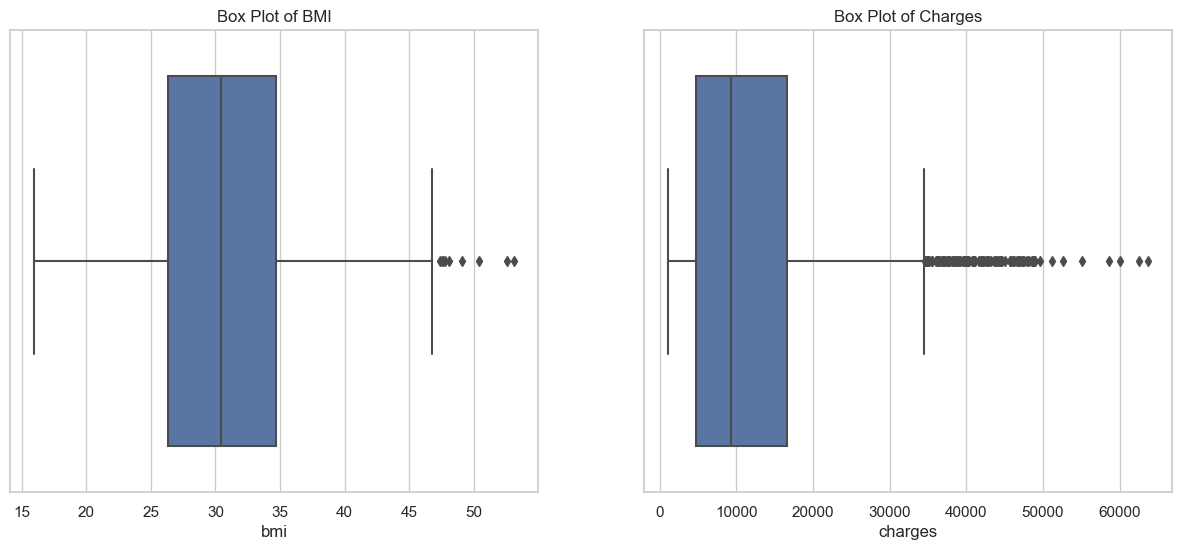

In [64]:
# Creating box plots for BMI and Charges
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

#for BMI
plt.subplot(1, 2, 1)
sns.boxplot(x=data_encoded['bmi'])
plt.title('Box Plot of BMI')

#for Charges
plt.subplot(1, 2, 2)
sns.boxplot(x=data_encoded['charges'])
plt.title('Box Plot of Charges')

plt.show()
#shows that there are alot of outliers in BMI and Charges feature

In [65]:
# Standardizing
scaler_standard = StandardScaler()
data_encoded[['bmi_standardized', 'charges_standardized']] = scaler_standard.fit_transform(data_encoded[['bmi', 'charges']])
# Normalizing
scaler_minmax = MinMaxScaler()
data_encoded[['bmi_normalized', 'charges_normalized']] = scaler_minmax.fit_transform(data_encoded[['bmi', 'charges']])

data_encoded.head()

#the data is now on a scale

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_standardized,charges_standardized,bmi_normalized,charges_normalized
0,19,27.900,0,16884.92400,False,True,False,False,True,-0.453160,0.297857,0.321227,0.251611
1,18,33.770,1,1725.55230,True,False,False,True,False,0.509422,-0.954381,0.479150,0.009636
2,28,33.000,3,4449.46200,True,False,False,True,False,0.383155,-0.729373,0.458434,0.053115
3,33,22.705,0,21984.47061,True,False,True,False,False,-1.305052,0.719104,0.181464,0.333010
4,32,28.880,0,3866.85520,True,False,True,False,False,-0.292456,-0.777499,0.347592,0.043816


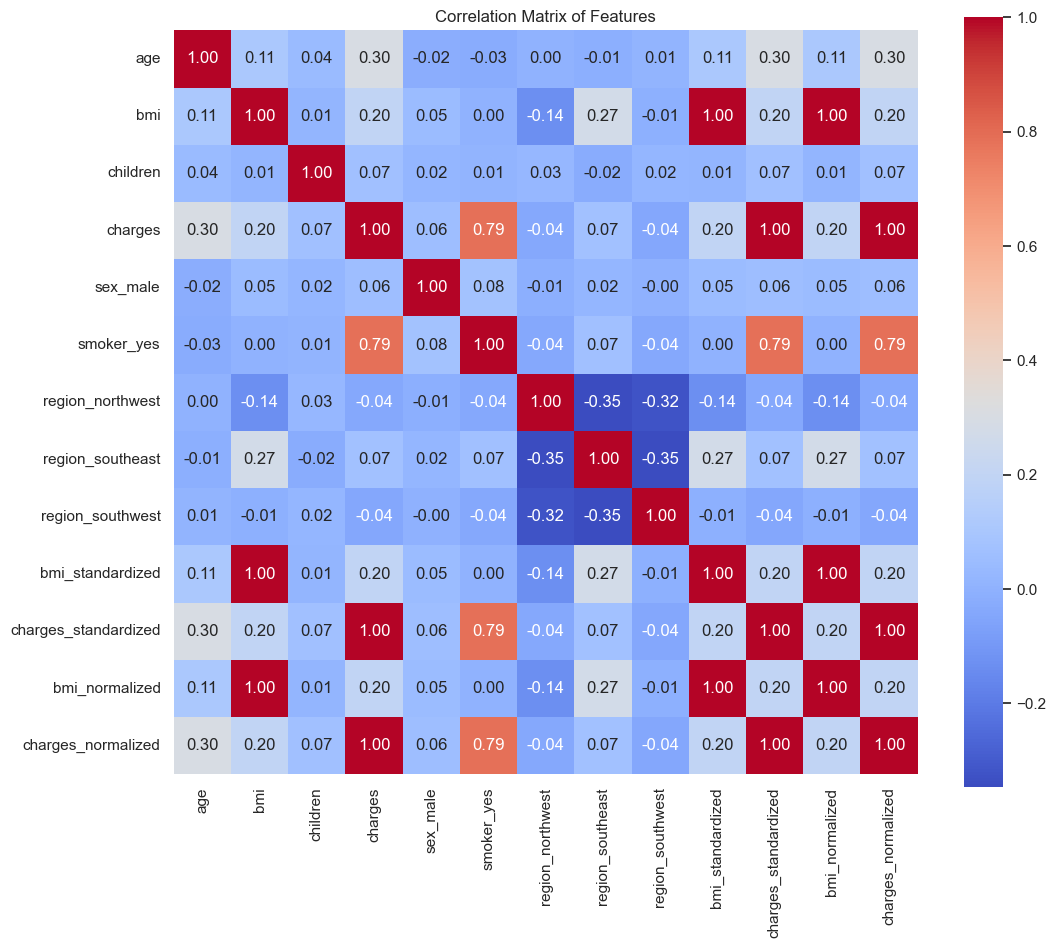

In [66]:
#correlation matrix
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(12, 10))

#heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [67]:
#removing one of the pair of highly correlated features 

# Identifying highly correlated pairs (above a certain threshold, e.g., 0.8 or -0.8)
high_corr_threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_pairs.append((correlation_matrix.columns[j], colname))

# Removing one variable from each highly correlated pair
columns_to_remove = set([pair[1] for pair in highly_correlated_pairs])
data_reduced = data_encoded.drop(columns=columns_to_remove)

#New correlation matrix
reduced_correlation_matrix = data_reduced.corr()

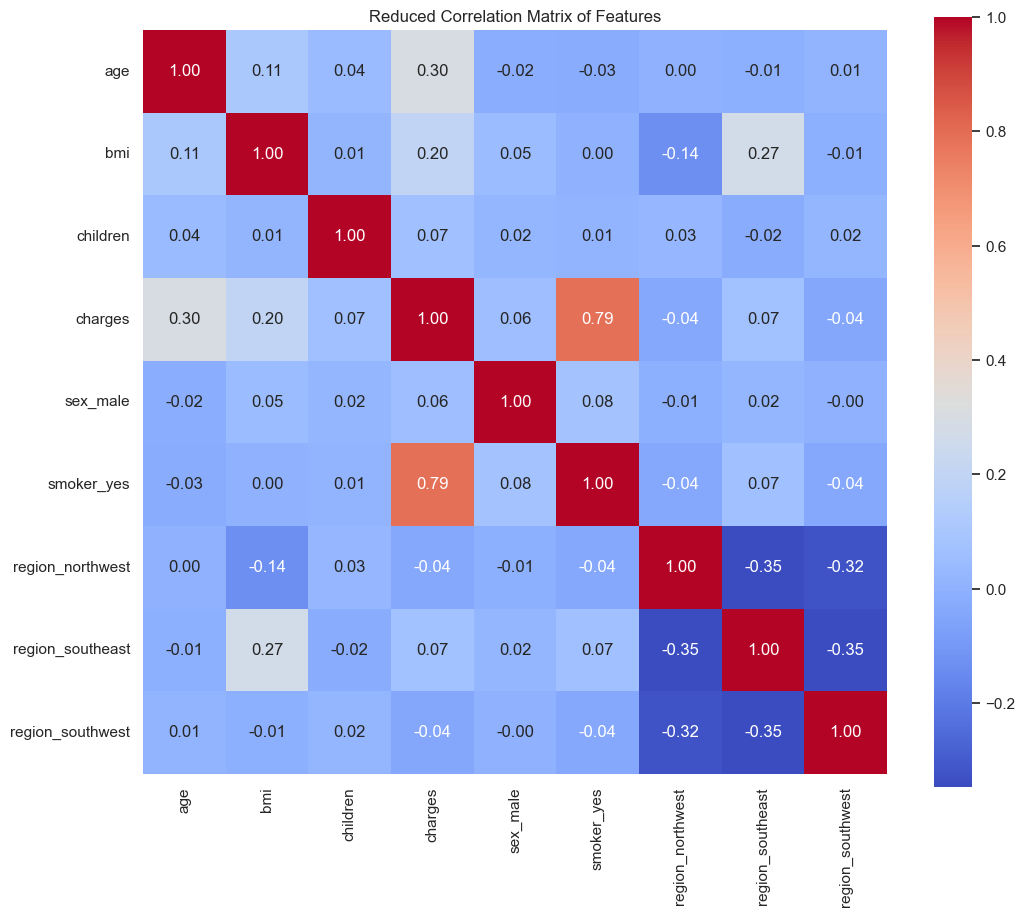

({'bmi_normalized',
  'bmi_standardized',
  'charges_normalized',
  'charges_standardized'},
 [('bmi', 'bmi_standardized'),
  ('charges', 'charges_standardized'),
  ('bmi', 'bmi_normalized'),
  ('bmi_standardized', 'bmi_normalized'),
  ('charges', 'charges_normalized'),
  ('charges_standardized', 'charges_normalized')])

In [68]:
# Visualizaion 
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Reduced Correlation Matrix of Features")
plt.show()

columns_to_remove, highly_correlated_pairs

#Multicollinearity due to high correlation between different independent variables might not 
#be as important. New correlation matrix still offers the same insights as the last.

In [48]:
#spliting the dataset into testing and training sets

# Defining the features (X) and target (y)
X = data_reduced.drop('charges', axis=1)  # we exclude the target variable 'charges'
y = data_reduced['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1069, 8), (268, 8), (1069,), (268,))

In [51]:
#applying linear regression
# Creating the linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(35478020.67523559, 0.8069287081198012)

In [70]:
#improving MSE and R-Square value 

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Creating a new linear regression model for the polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predicting on the test data with polynomial features
y_pred_poly = model_poly.predict(X_test_poly)

# Calculating the performance metrics for the polynomial model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

mse_poly, r2_poly
#The target variable, 'charges', is effected by multiple factors. 
#we get improved performance of the model when polynomial features were introduced. 

(21585843.7244217, 0.8825298972468536)